# Analiyzing Crime in Los Angeles

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## 1. Timing Patterns: When Does Crime Happen?

### Understanding the Daily Pulse of Crime

The first and most critical step for the LAPD to effectively manage resources is understanding the daily cycle of criminal activity. We analyzed the time of day for every reported incident to identify when the city faces its highest risk. This allows us to move beyond anecdotal evidence and deploy patrols strategically. The graph below illustrates the complete 24-hour flow of crime, showing when the city is safest and when we see the greatest surge in incidents.

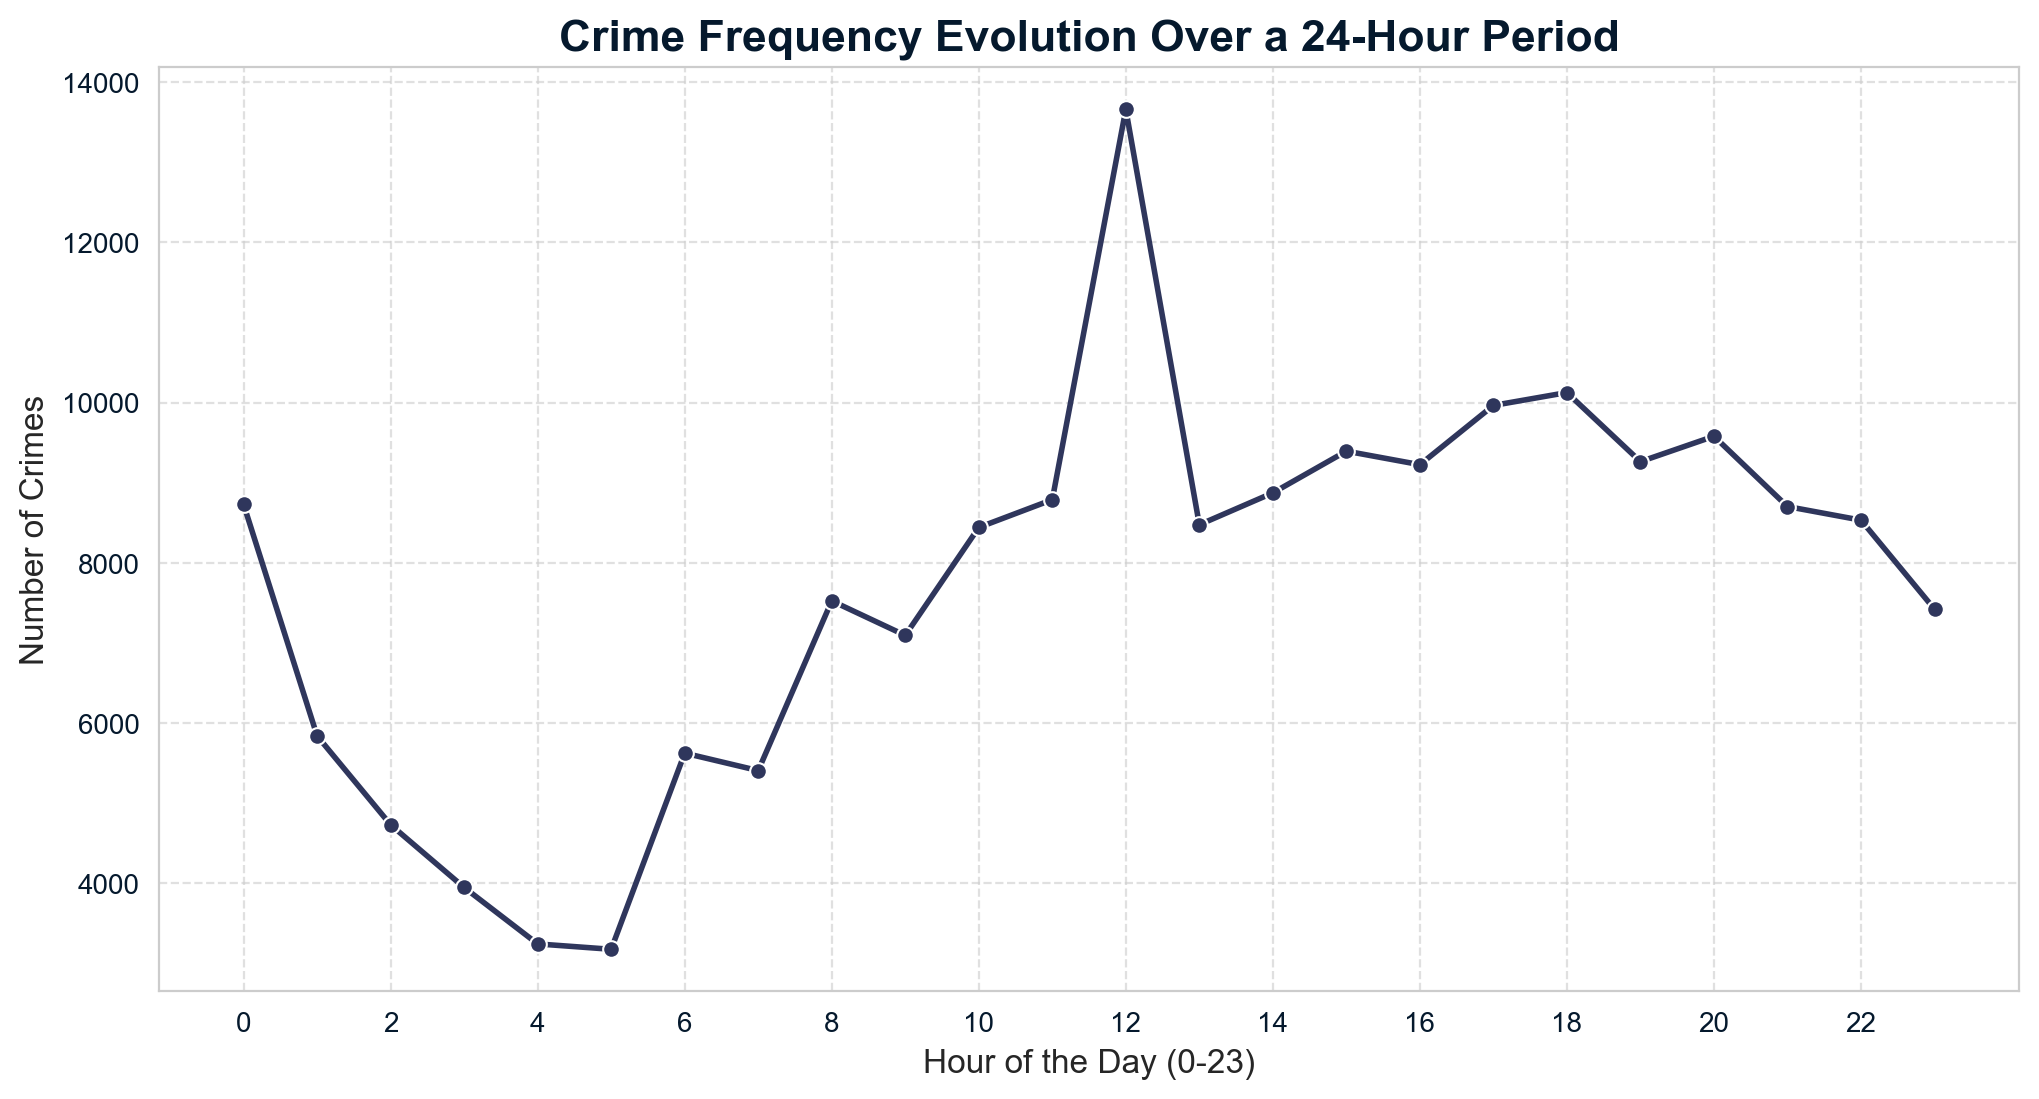

In [63]:
#Highest hour with frequency of crimes
crimes['HOUR OCC'] = crimes['TIME OCC'].astype(str).str.zfill(4).str[:2].astype(int)
peak_crime_hour = crimes['HOUR OCC'].value_counts().idxmax()

#Counting
crime_counts_chrono = crimes['HOUR OCC'].value_counts().sort_index().reset_index()
crime_counts_chrono.columns = ['Hour', 'Count']

plt.figure(figsize=(12, 6))

# plot
sns.lineplot(
    data=crime_counts_chrono,
    x='Hour',
    y='Count',
    marker='o', 
    color='#2F365C',
    linewidth=2
)

plt.title('Crime Frequency Evolution Over a 24-Hour Period', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(0, 24, 2)) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Key Finding: The Midday Peak

The analysis clearly shows that crime rates mirror the rhythm of city life. Activity remains at its lowest during the early morning hours (4 AM to 9 AM) but begins a sharp climb as the city wakes up. The peak crime hour is 12:00 PM (noon), confirming that the highest risk occurs during the middle of the working day.

Following the midday surge, crime frequency remains high through the late afternoon (3 PM – 7 PM), aligning with rush hour traffic and increased commercial activity. The frequency only begins to drop significantly after 10 PM. Actionable Insight: To be proactive, patrol resources should be heavily concentrated and visible between 10 AM and 7 PM to effectively deter criminal activity during these high-exposure periods.

## Night Crime Hotspots: Where is the Danger?

### Identifying Nighttime Risk Areas

While the highest frequency of crime occurs during the midday, criminal activity doesn't stop when the sun goes down. The LAPD requires targeted resource deployment for the most dangerous areas during the vulnerable ***nighttime hours (10 PM to 3:59 AM)***. The ranking below identifies the specific geographical divisions that experience the highest volume of crimes when most of the city is asleep. This analysis helps us focus resources on these critical hotspots.

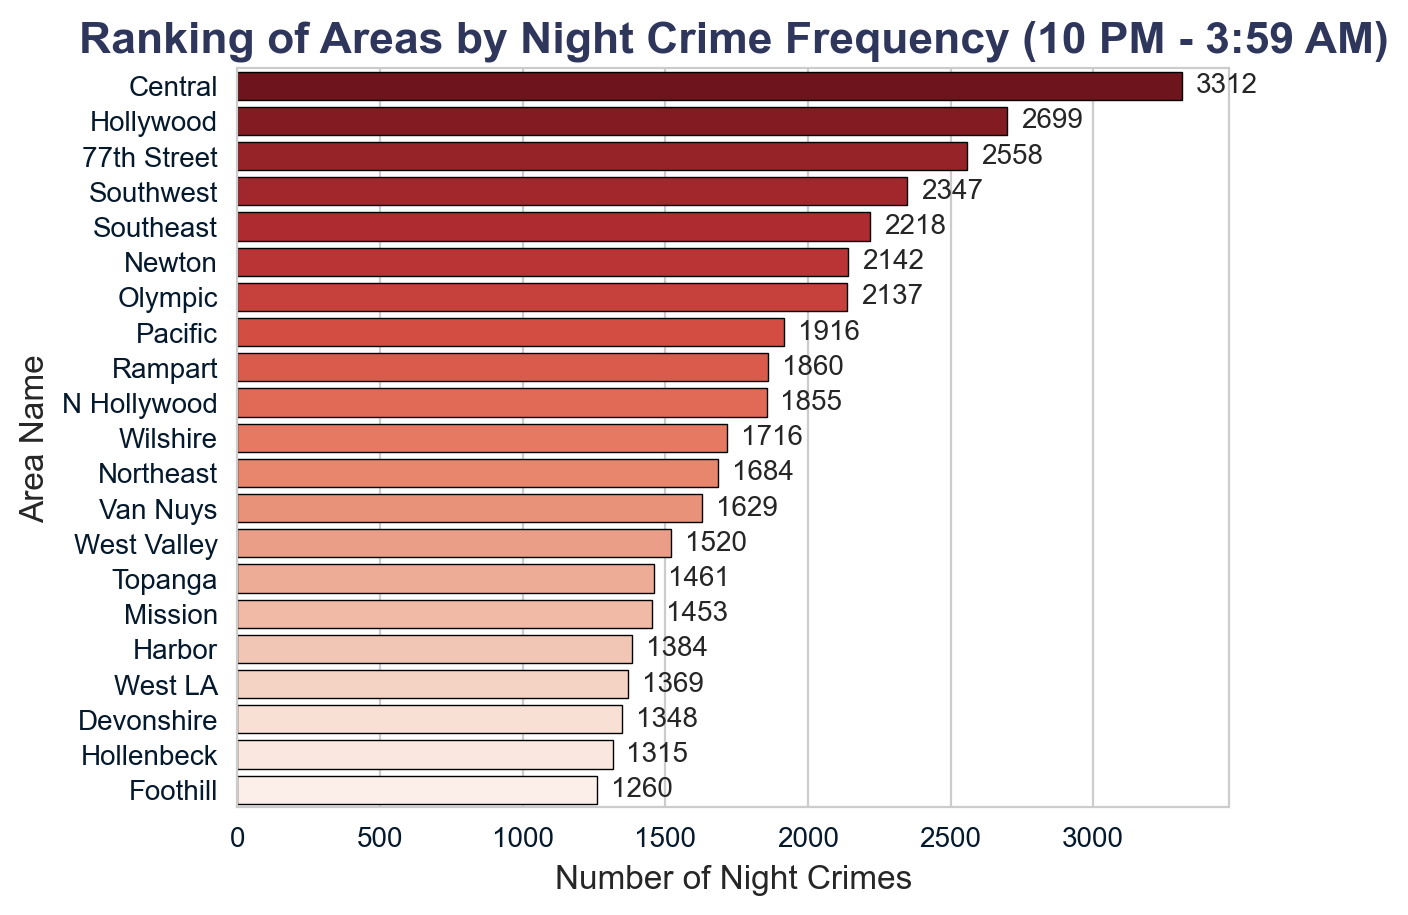

In [64]:
#Crimes cimmited between 10 pm and 3:59 am.
night_crimes = crimes[(crimes['HOUR OCC'] >= 22) |
                      (crimes['HOUR OCC'] <= 3)]
peak_night_crime_location = night_crimes['AREA NAME']. value_counts().idxmax()

# Calculate frequency of night crimes by Area Name
night_crime_counts = night_crimes['AREA NAME'].value_counts().reset_index()
night_crime_counts.columns = ['Area Name', 'Night Crime Count']

# Plot
ax = sns.barplot(
    data=night_crime_counts,
    x='Night Crime Count', 
    y='Area Name',
    palette='Reds_r',
    edgecolor='black',
    linewidth=0.5
)

# Custom labels
plt.title(f'Ranking of Areas by Night Crime Frequency (10 PM - 3:59 AM)', 
          fontsize=16, 
          fontweight='bold', 
          color='#2F365C')
plt.xlabel('Number of Night Crimes', fontsize=12)
plt.ylabel('Area Name', fontsize=12)

# Add annotations to all bars
for container in ax.containers:
    ax.bar_label(container, padding=5, fontsize=10) 
plt.show()

### Key Finding: Central Area Dominance

The analysis clearly establishes the **Central** division as the undeniable epicenter of night crime, followed by **Hollywood** and **77th Street**. This geographical pattern is largely explained by the **nature and population density** of the Central area.

**Why Central Dominates:** The Central area of Los Angeles includes Downtown (DTLA), which remains a high-activity hub well past midnight. This area is characterized by:

1. **High Concentration of Businesses & Nightlife:** Bars, clubs, and late-night commercial activity increase the opportunities for crimes related to disorder, theft, and assault.

2. **Transitory Population:** A large volume of people passing through (pedestrians, commuters, and tourists) are often victims of opportunity crimes, such as robbery.

In contrast, the areas at the bottom of the list (like Foothill and Hollenbeck) are typically more residential and geographically isolated from the major commercial centers, naturally resulting in lower late-night activity and fewer reported incidents. 

**Actionable Insight:** The LAPD should prioritize mobile units and foot patrols in the Central and Hollywood divisions during these hours to mitigate crimes against persons and property.

## 3. Victimization Risk: Who is the Target?

### Who is the Target? Analyzing Victimization Risk by Age

The final piece of the puzzle is understanding who is most vulnerable to crime. We categorized victims into standard age brackets to measure the frequency of crimes committed against each group. The visualization below is not just a demographic snapshot, but a reflection of **lifestyle and exposure**, providing insights into the typical victim profile.



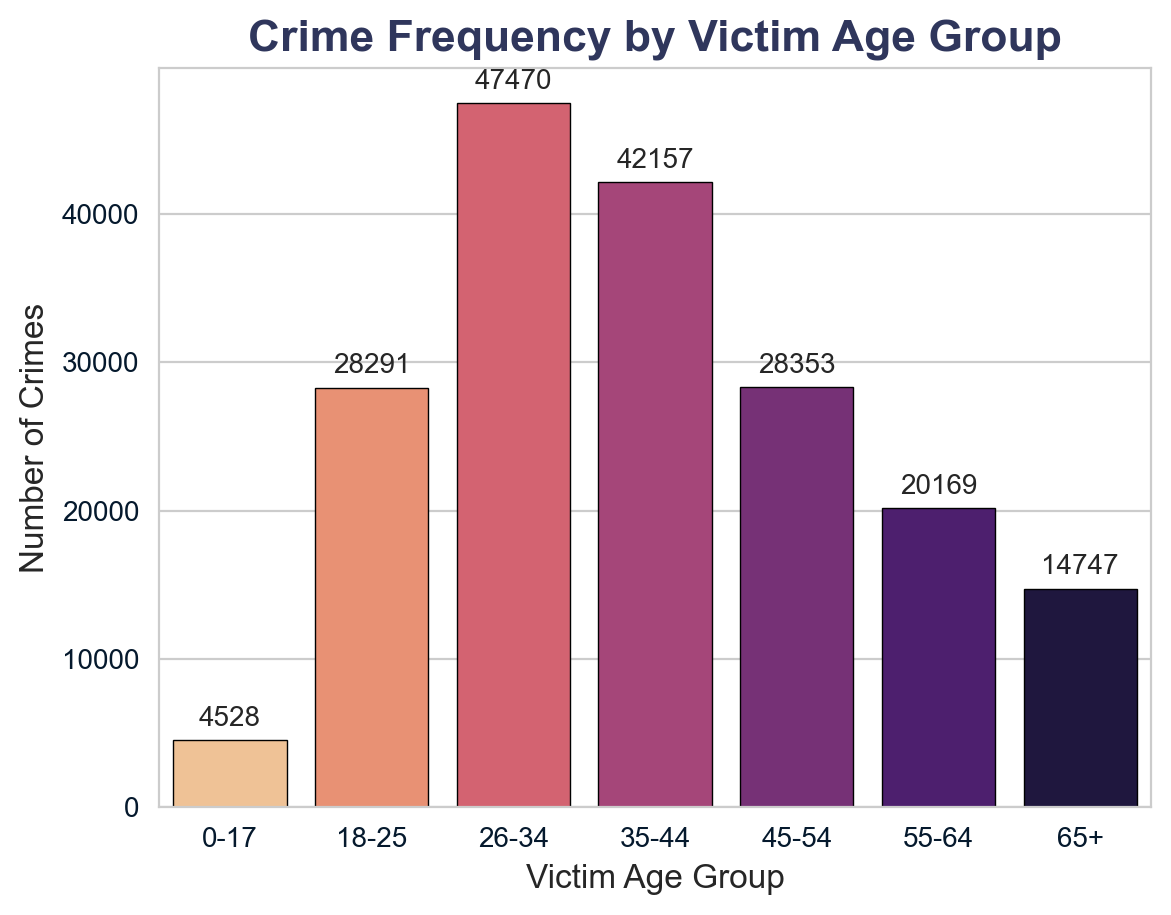

<Figure size 1000x600 with 0 Axes>

In [65]:

# Define bins (limits) and labels for age groups as required by the task
bins = [0, 17, 25, 34, 44, 54, 64, crimes['Vict Age'].max()]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create the 'Age Group' column using pd.cut
crimes['Age Group'] = pd.cut(
    crimes['Vict Age'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# Calculate frequencies and sort by index (age group order) to create the required Series
victim_ages = crimes['Age Group'].value_counts().sort_index()


# Convert the victim_ages Series to a DataFrame for plotting with seaborn
df_victim_ages = victim_ages.reset_index()
df_victim_ages.columns = ['Age Group', 'Crime Count']


# Plot
ax = sns.barplot(
    data=df_victim_ages,
    x='Age Group',
    y='Crime Count',
    palette='magma_r', 
    edgecolor='black',
    linewidth=0.5
)

# Add annotations to all bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fmt='%.0f')

# Custom labels
plt.title('Crime Frequency by Victim Age Group', 
          fontsize=16, 
          fontweight='bold', 
          color='#2F365C')
plt.xlabel('Victim Age Group', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=0) 

plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

### Key Finding: The High-Risk Working Age

The analysis of victim age reveals a clear concentration of risk among the working population, challenging the common assumption that younger individuals are the sole primary targets. The highest frequency of crimes is recorded in the **26-34** and **35-44** age groups.

**The Theory of Exposure:** This pattern is primarily explained by victim exposure and lifestyle:

1. **Peak Working Age:** Individuals in their late 20s to mid-40s are the most active members of society. They commute daily, participate in more commercial and social activities, and have a higher disposable income, making them prime targets for crimes of opportunity (e.g., robbery, theft).

2. **The "65+" Drop:** The risk drops significantly for victims aged 65 and older. This is often due to reduced routine activity outside the home, resulting in less frequent convergence with motivated offenders.

**Actionable Insight:** While all demographics must be protected, preventative measures like **street lighting, safety apps, and visible patrolling** should be heavily promoted toward the highly exposed working population to mitigate their elevated risk during daily activities.

## Conclusion and Recommendations: A Data-Driven Strategy

### Summary of Key Findings

This analysis provided the Los Angeles Police Department (LAPD) with data-driven insights into the **temporal, geographical, and demographic** patterns of crime in the city. Our key findings are:

1. **Time of Day (Temporal Risk):** The highest frequency of crime occurs at **12:00 PM (noon)**, indicating that the peak risk aligns with maximum working and commercial activity.

2. **Night Crime Hotspots (Geographical Risk):** The **Central** and **Hollywood** divisions are the undisputed epicenters of night crime (10 PM – 3:59 AM), driven by high concentrations of nightlife and transitory populations.

3. **Victimization Profile (Demographic Risk):** The population segment at the highest risk of victimization is the **working-age group (26-44)**, primarily due to increased exposure during daily routines.

### Actionable Recommendations for Resource Allocation

Based on these findings, we recommend the following strategic adjustments to optimize the LAPD's deployment and preventative efforts:

1. **Shift Patrol Concentration: Heavily increase patrol presence and visibility between 10 AM and 7 PM** city-wide. This strategic window covers the sharp rise, the midday peak, and the late afternoon rush hour, maximizing deterrence during peak exposure times.

2. **Targeted Nighttime Deployment:** Maintain **dedicated foot patrols and mobile units** focused specifically on the **Central and Hollywood divisions** from 10 PM onwards to suppress disorder and property crimes in nightlife areas.

3. **Community Risk Campaigns:** Launch public safety campaigns specifically targeting the **working population (age 26-44)**. These campaigns should emphasize situational awareness, securing personal property, and travel safety protocols, directly addressing the demographic found to be at the highest risk of victimization.

By integrating these data-backed insights into operational planning, the LAPD can achieve a more effective and proactive crime mitigation strategy, moving resources from times and places of low activity to areas of highest demonstrated need.

